#**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1. Import Libraries**

In [ ]:
# Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats

# Date Handling
from datetime import datetime

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# Set Visualization Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# **2. Load & Understanding the Datasets**

***2.1 Cab Dataset***

In [ ]:
# Load dataset
cab_df = pd.read_csv('/content/drive/MyDrive/G2M Cab investement/Cab_Data (1).csv')

# Initial inspection
print(" Cab Dataset:")
display(cab_df.head())
print("\nData Info:")
display(cab_df.info())
print("\nMissing Values:")
display(cab_df.isnull().sum())

 Cab Dataset:


Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


None


Missing Values:


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [ ]:
# Convert date (Excel serial to datetime)
cab_df['Date of Travel'] = pd.to_datetime(
    pd.Timestamp('1899-12-29') + pd.to_timedelta(cab_df['Date of Travel'], unit='D')
)

# Check converted data
print("\nAfter Date Conversion:")
display(cab_df[['Date of Travel']].head())


After Date Conversion:


Date of Travel
0     2016-01-07
1     2016-01-05
2     2016-01-01
3     2016-01-06
4     2016-01-02

In [ ]:
# Data description
print("\nDescriptive Stats:")
display(cab_df.describe())


Descriptive Stats:


Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-16 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-01 00:00:00       1.900000   
25%      1.011081e+07            2016-11-22 00:00:00      12.000000   
50%      1.022104e+07            2017-09-09 00:00:00      22.440000   
75%      1.033094e+07            2018-05-11 00:00:00      32.960000   
max      1.044011e+07            2018-12-30 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip  
count  359392.000000  359392.000000  
mean      423.443311     286.190113  
min        15.600000      19.000000  
25%       206.437500     151.200000  
50%       386.360000     282.480000  
75%       583.660000     413.683200  
max      2048.030000     691.200000  
std       274.378911     157.993661

In [ ]:
#Understanding Company Column
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
#Understanding City Column
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

***2.2 City Dataset***

In [ ]:
# Load dataset
city_df = pd.read_csv('/content/drive/MyDrive/G2M Cab investement/City.csv')

# Initial inspection
print("City Dataset:")
display(city_df.head())

City Dataset:


City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [ ]:
#Population and Users columns should be changed to be floats
city_df['Population'] = city_df['Population'].str.replace(',','').astype(float)
city_df['Users'] = city_df['Users'].str.replace(',','').astype(float)

# Verify conversion
print("\nAfter Cleaning:")
display(city_df.info())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 612.0+ bytes


None

In [ ]:
# Descriptive stats
print("\nCity Statistics:")
display(city_df.describe())


City Statistics:


Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000

***2.3 Transaction Dataset***

In [ ]:
# Load dataset
transaction_df = pd.read_csv('/content/drive/MyDrive/G2M Cab investement/Transaction_ID.csv')

# Initial inspection
print("Transaction Dataset:")
display(transaction_df.head())


Transaction Dataset:


Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [ ]:
# Check payment modes
print("\nPayment Mode Distribution:")
display(transaction_df['Payment_Mode'].value_counts())


Payment Mode Distribution:


Payment_Mode
Card    263991
Cash    176107
Name: count, dtype: int64

In [ ]:
# Data types check
print("\nData Types:")
display(transaction_df.dtypes)


Data Types:


Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

***2.4 Customer Data***

In [ ]:
# Load dataset
customer_df = pd.read_csv('/content/drive/MyDrive/G2M Cab investement/Customer_ID.csv')

# Initial inspection
print("Customer Dataset:")
display(customer_df.head())


Customer Dataset:


Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [ ]:
# Check gender distribution
print("\nGender Distribution:")
display(customer_df['Gender'].value_counts(normalize=True))


Gender Distribution:


Gender
Male      0.540196
Female    0.459804
Name: proportion, dtype: float64

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# Descriptive stats
print("\nCustomer Statistics:")
display(customer_df.describe())


Customer Statistics:


Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

***2.5 Holiday Data (New)***


In [ ]:
# Load dataset
holiday_df = pd.read_csv('/content/drive/MyDrive/G2M Cab investement/holidays.csv')

# Initial inspection
print(" Holiday Dataset: ")
display(holiday_df.head())

 Holiday Dataset: 


date                              holiday
0   1/1/2016                       New Year's Day
1  1/18/2016  Birthday of Martin Luther King, Jr.
2  2/15/2016                Washington's Birthday
3  5/30/2016                         Memorial Day
4   7/4/2016                     Independence Day

In [ ]:
# Convert date column
if 'Date' in holiday_df.columns:
    holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])
display(holiday_df.head())

date                              holiday
0   1/1/2016                       New Year's Day
1  1/18/2016  Birthday of Martin Luther King, Jr.
2  2/15/2016                Washington's Birthday
3  5/30/2016                         Memorial Day
4   7/4/2016                     Independence Day

In [ ]:
# Check unique holidays
print("\nUnique Holidays:")
display(holiday_df['holiday'].unique())



Unique Holidays:


array(["New Year's Day", 'Birthday of Martin Luther King, Jr.',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day'], dtype=object)

In [ ]:
# Data types
print("\nData Types:")
display(holiday_df.dtypes)


Data Types:


date       object
holiday    object
dtype: object

# **3. Merge & Visualize the Entire Dataset**

***3.1 Merge all Datasets and Create 2 new Column***

In [ ]:
# Merge all core datasets first
df = (cab_df.merge(transaction_df, on='Transaction ID')
            .merge(customer_df, on='Customer ID')
            .merge(city_df, on='City'))


In [ ]:
# Create the two new required columns
df['Is Holiday'] = np.where(df['Date of Travel'].isin(holiday_df['date']), 'Yes', 'No')
df['Profit on Trip'] = df['Price Charged'] - df['Cost of Trip']

In [ ]:
# Verify the merge and new columns
print("\nMerged Dataset Sample:")
display(df[['Date of Travel', 'Is Holiday', 'Price Charged', 'Cost of Trip', 'Profit on Trip']].head(3))
print("\nHoliday Ride Counts:")
print(df['Is Holiday'].value_counts())


Merged Dataset Sample:


Date of Travel Is Holiday  Price Charged  Cost of Trip  Profit on Trip
0     2016-01-07         No         370.95       313.635          57.315
1     2016-01-05         No         358.52       334.854          23.666
2     2016-01-01        Yes         125.20        97.632          27.568


Holiday Ride Counts:
Is Holiday
No     350553
Yes      8839
Name: count, dtype: int64


In [ ]:
df.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-01  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-06  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-02  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month)  Population    Users Is Holiday  Profit on Trip  
0               10813    814885.0  24701.0         No          57.315  
1                9237    814885.0  24701.0         No          23.666  
2               11242    814885.0  24701.0        Yes          27.568  
3               23327    814885.0  24701.0         No          25.798  
4                8536    814885.0  24701.0         No          16.844

***3.2 Visualize the Data***

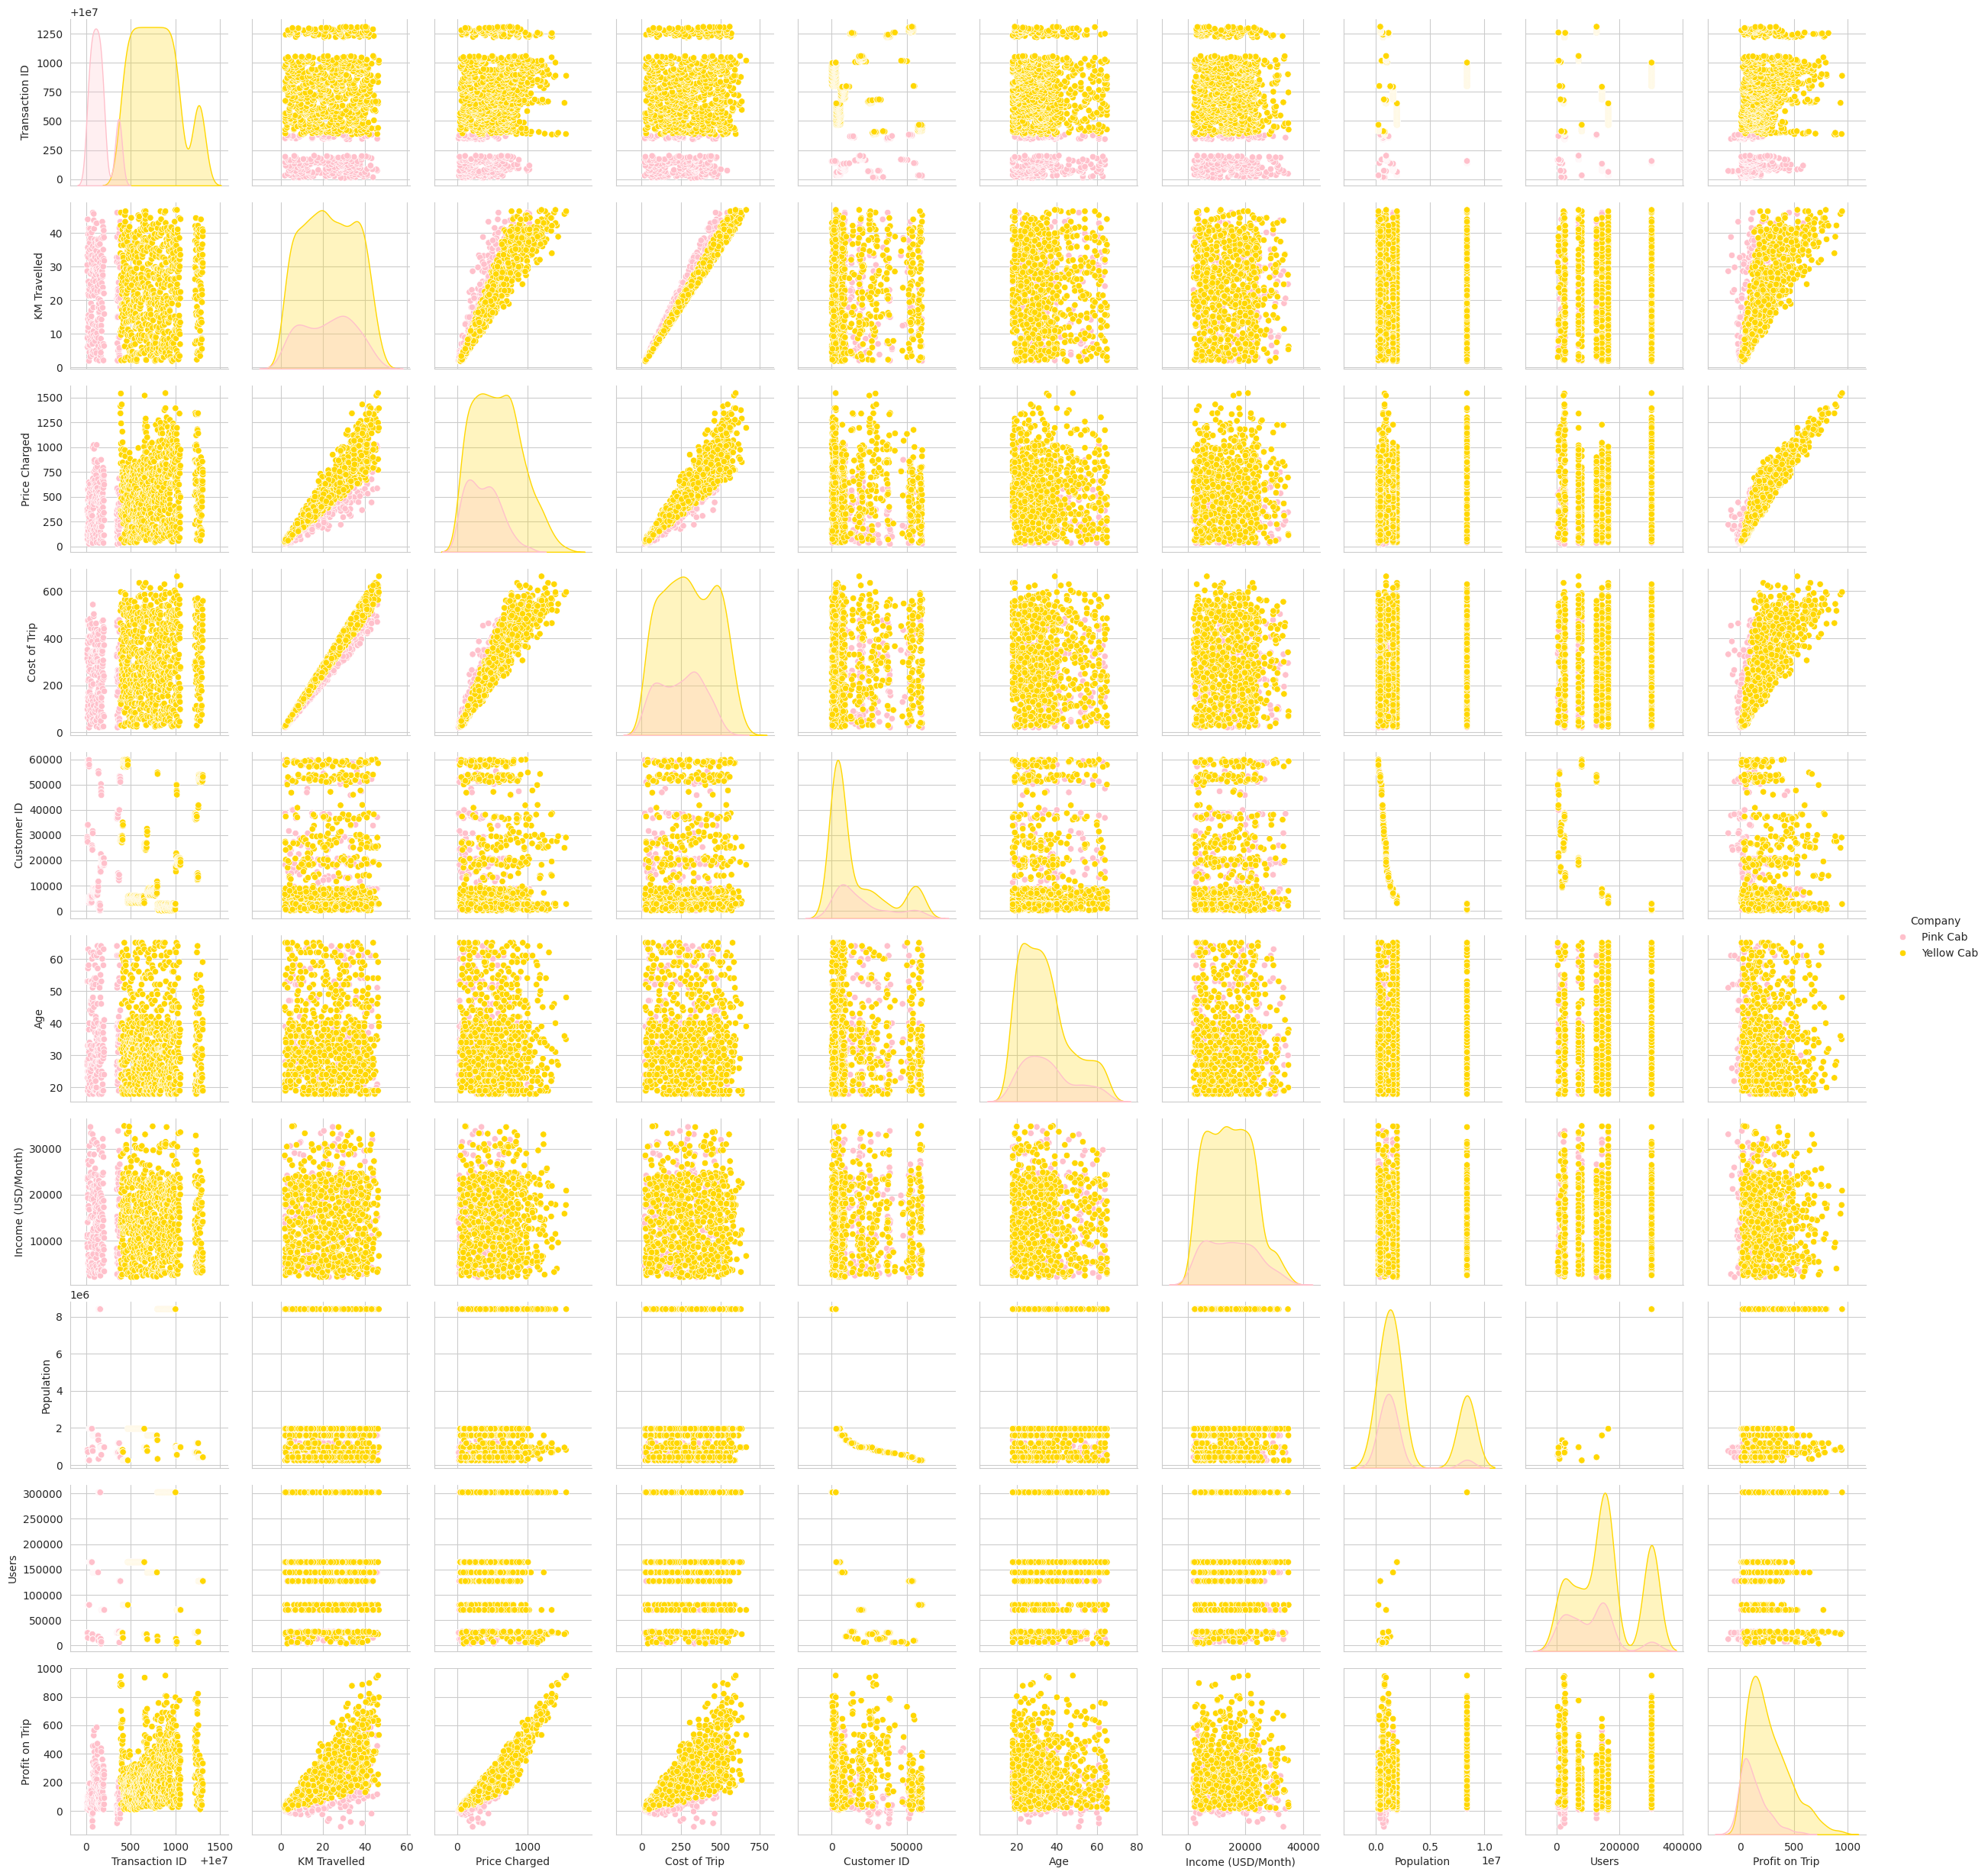

In [ ]:
# Define a custom palette
custom_palette = {
    'Pink Cab': 'pink',
    'Yellow Cab': 'gold'  # or 'yellow' but 'gold' shows better on white background
}

# Create the pairplot with custom colors
sns.pairplot(df.head(1000), hue='Company', palette=custom_palette)

***3.3 Correaltion Analysis***

In [ ]:
# Select numeric columns for correlation
numeric_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit on Trip',
                'Age', 'Income (USD/Month)', 'Population', 'Users']

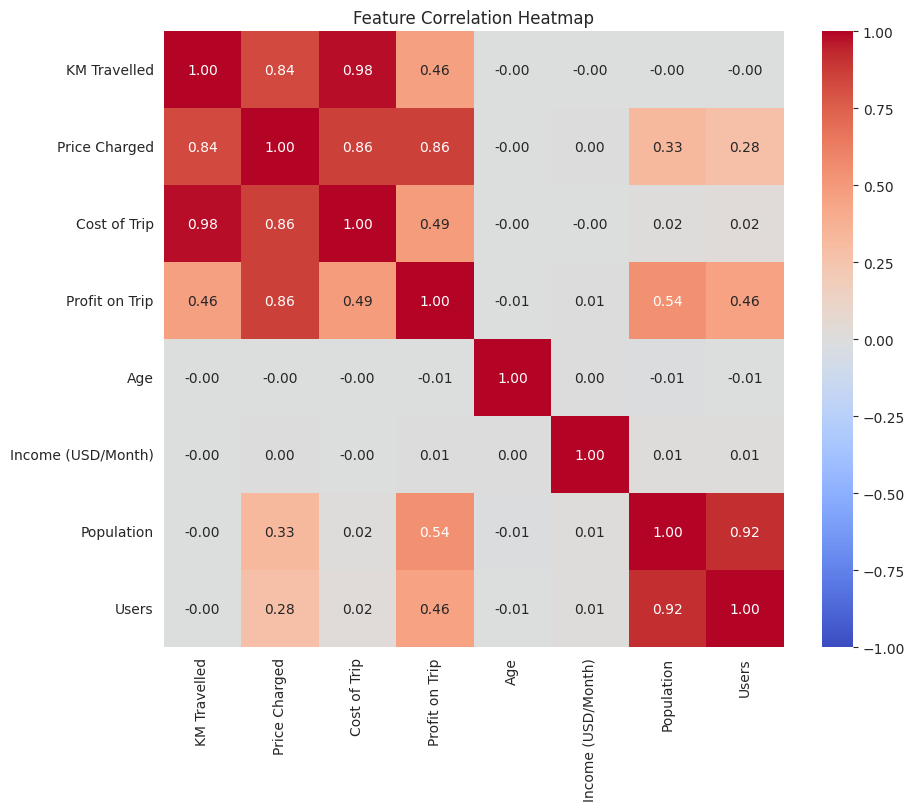

In [ ]:
#Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The strongest relationships are



1.   KM Travelled ↔ Cost of Trip (0.98)
2.   Population ↔ Users (0.92)
3.   Price Charged ↔ Profit on Trip (0.86)









In [ ]:
# Top correlations with Profit
print("\nTop 5 Features Correlated with Profit on trip:")
print(corr_matrix['Profit on Trip'].abs().sort_values(ascending=False)[1:6])


Top 5 Features Correlated with Profit on trip:
Price Charged    0.864154
Population       0.544079
Cost of Trip     0.486056
KM Travelled     0.462768
Users            0.457758
Name: Profit on Trip, dtype: float64


#**4. EDA**

4.1 Travel of Users

In [ ]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values

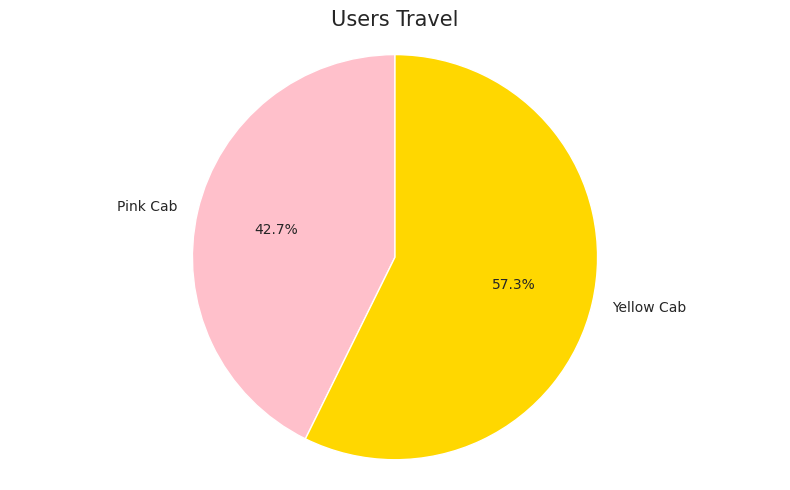

In [ ]:
# Hardcoded, cleaned-up values and labels
value = np.array([125590.81333003, 168473.24698104])
index = ['Pink Cab', 'Yellow Cab']

# Ensure no NaNs or extra entries
assert len(value) == 2 and len(index) == 2, "Mismatch in value-label length"
assert not np.isnan(value).any(), "Values contain NaNs"

# Define exact colors
colors = ['pink', 'gold']

# Plot pie chart
figp, axp = plt.subplots(figsize=(8, 5), facecolor='white')  # Ensures white background
axp.pie(value,
        labels=index,
        autopct='%1.1f%%',
        shadow=False,
        startangle=90,
        colors=colors)

axp.axis('equal')  # Equal aspect ratio for a perfect circle
plt.title('Users Travel', fontsize=15)
plt.tight_layout()
plt.show()


As we can see, people prefer to take **Yellow Cab** rides over Pink Cab rides.

4.2 Price Charged

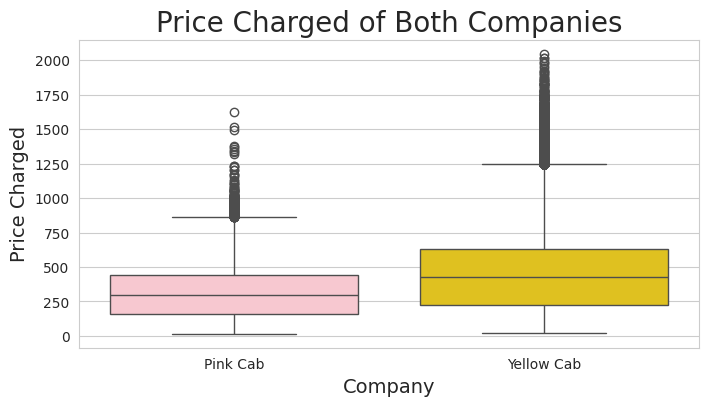

In [ ]:
# Define custom colors for each company
custom_palette = {'Pink Cab': 'pink', 'Yellow Cab': 'gold'}

# Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Company', y='Price Charged', data=df, palette=custom_palette)

plt.title('Price Charged of Both Companies', fontsize=20)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price Charged', fontsize=14)
plt.show()


As we can see, **Yellow Cab** charges a higher price than Pink Cab.

4.3 Distribution of Profit on Trip

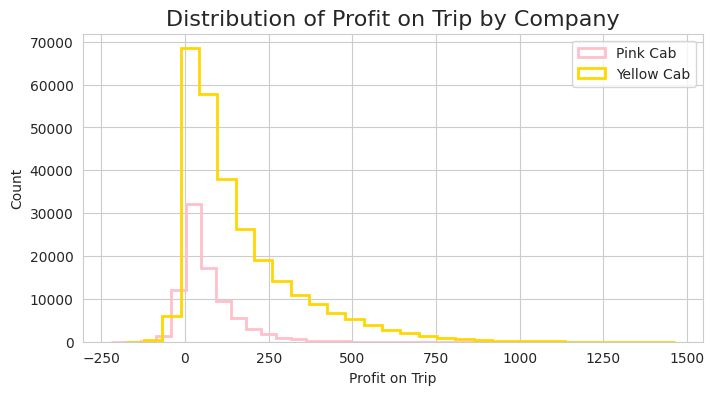

In [ ]:
plt.figure(figsize=(8, 4))

plt.hist(df[df['Company'] == 'Pink Cab']['Profit on Trip'],
         bins=30, color='pink', label='Pink Cab', histtype='step', linewidth=2)

plt.hist(df[df['Company'] == 'Yellow Cab']['Profit on Trip'],
         bins=30, color='gold', label='Yellow Cab', histtype='step', linewidth=2)

plt.title('Distribution of Profit on Trip by Company', fontsize=16)
plt.xlabel('Profit on Trip')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


Profit Distribution accounts larger for Yellow Cab.

4.4 KM Travelled Distribution

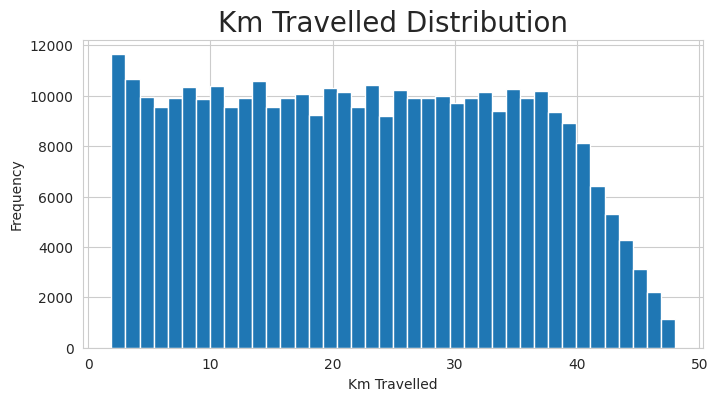

In [ ]:
plt.figure(figsize = (8, 4))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

Most of the rides are between 2 to 48 KM.

4.5 Profit on trip per kM by Company & Year

In [ ]:
print(df.columns)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Is Holiday', 'Profit on Trip', 'Profit per KM'],
      dtype='object')


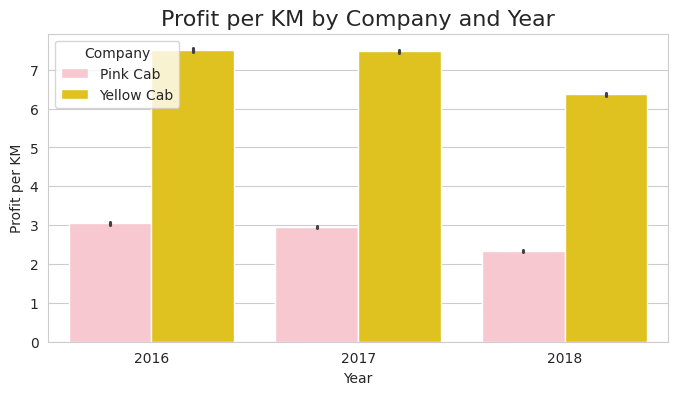

In [ ]:
# Calculate Profit per KM
df['Profit per KM'] = df['Profit on Trip'] / df['KM Travelled']

df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Year'] = df['Date of Travel'].dt.year


# Set color palette for consistency
sns.set_palette(['pink', 'gold'])

# Set figure size
plt.figure(figsize=(8, 4))

# Create barplot for Profit per KM by Year and Company
sns.barplot(x='Year', y='Profit per KM', hue='Company', data=df)

# Add title and labels
plt.title('Profit per KM by Company and Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Profit per KM')
plt.legend(title='Company')

# Show plot
plt.show()


Profit Per KM values are higher in 3 years for Yellow Cab than Pink Cab.

4.6 Profit per Kilometer by Company and Is Holiday

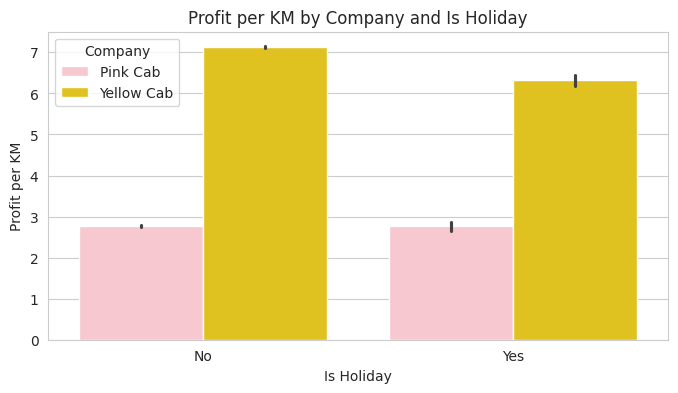

In [ ]:
# Set color palette
sns.set_palette(['pink', 'gold'])

# Set figure size
plt.figure(figsize=(8, 4))

# Create barplot
sns.barplot(x='Is Holiday', y='Profit per KM', hue='Company', data=df)

# Add title
plt.title('Profit per KM by Company and Is Holiday')

# Show plot
plt.show()

**4.7 Gender**

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


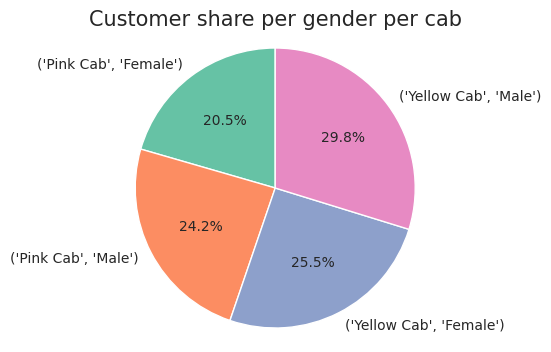

In [ ]:
# Grouping by Company and Gender, and counting unique customers
gender_cab = df.groupby(['Company', 'Gender'])['Customer ID'].nunique()
print(gender_cab)

# Prepare labels and values
labs = gender_cab.index
vals = gender_cab.values

# Choose 4 distinct colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Create figure and axis with white backgrounds
figp, axp = plt.subplots(figsize=(6, 4), facecolor='white')
axp.set_facecolor('white')

# Plot pie chart with shadow disabled
axp.pie(vals, labels=labs, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
axp.axis('equal')  # Ensure the pie is drawn as a circle

plt.title('Customer share per gender per cab', fontsize=15)
plt.show()

4.8 Mode of Payment

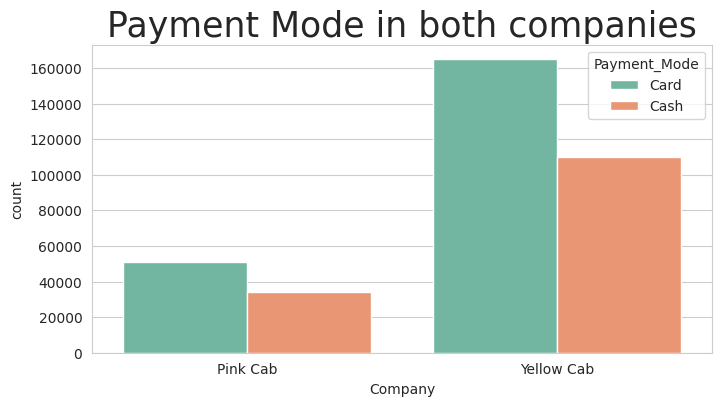

In [ ]:
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Change/add color codes as needed

plt.figure(figsize=(8, 4))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df, palette=custom_colors)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

It is evident that users would rather use a card to make payments than cash.

4.9 Profit % per year & per month

In [ ]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

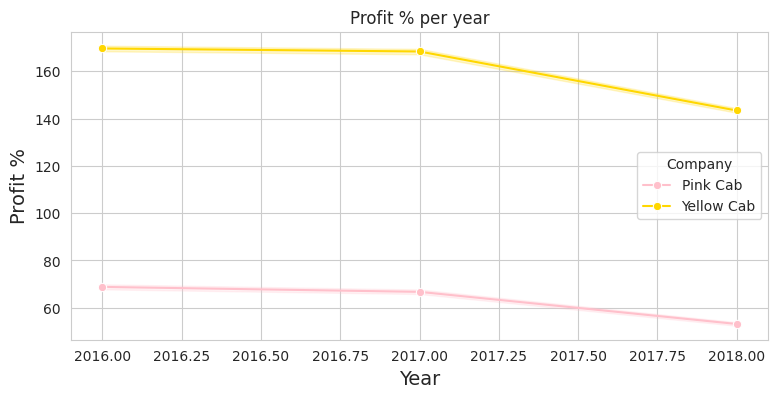

In [ ]:
plt.figure(figsize = (9, 4))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

The profit margin decrease w.r.t year

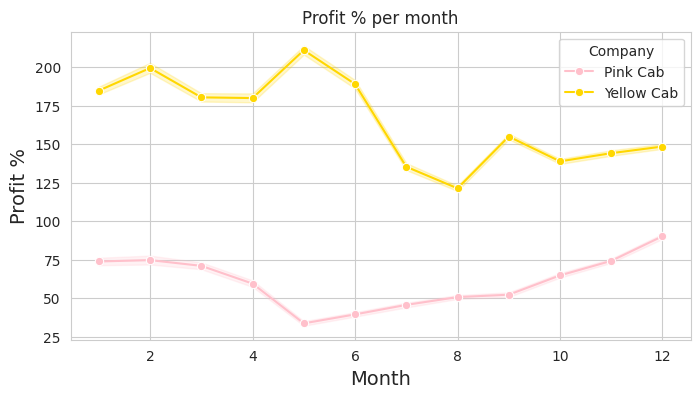

In [ ]:
plt.figure(figsize = (8, 4))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

The profit margin varies w.r.t month

4.10 Users Respective Population

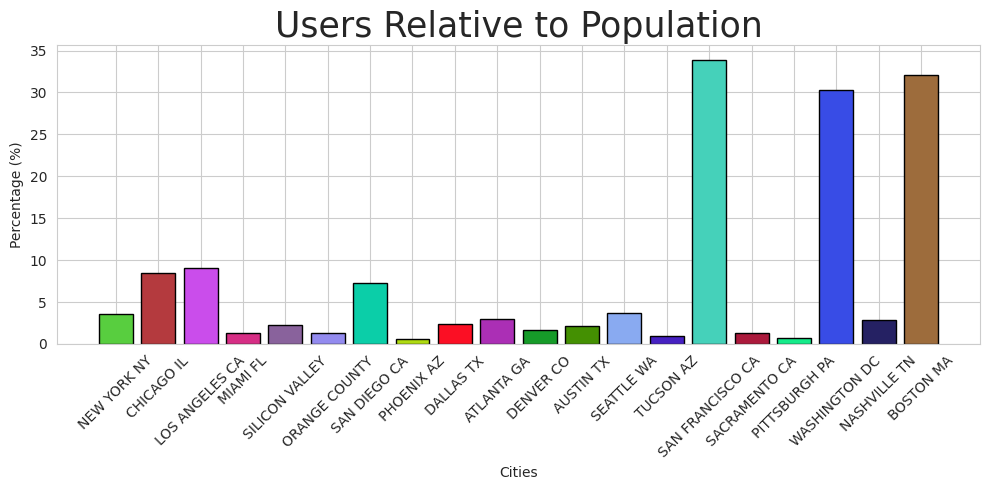

In [ ]:
from random import randint

# Calculate the percentage of users relative to the population
urp = (city_df['Users'] / city_df['Population']) * 100

# Get the list of cities to use as labels on the x-axis
city = city_df['City']

# Generate random colors for each city
colors = []
n = len(city)  # Number of cities
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(city, urp, color=colors, edgecolor='black')
plt.title('Users Relative to Population', fontsize=25)
plt.xlabel('Cities')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate city labels for better readability
plt.tight_layout()       # Adjust layout to prevent label cutoff
plt.show()


As we can see in cities San Francisco, Washington and Boston more than 30% of population use cab service

4.11 Price Charged w.r.t Distance

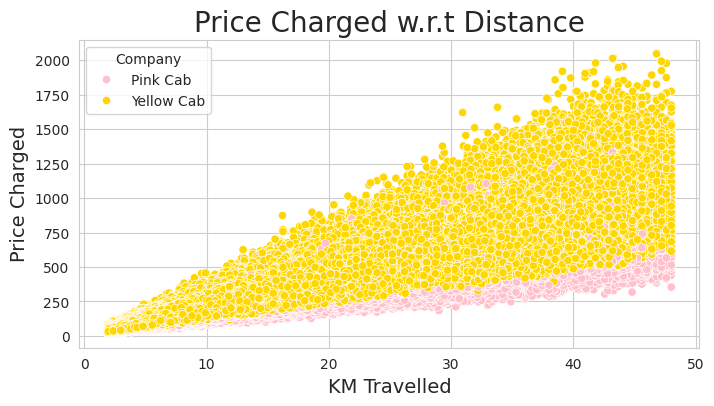

In [ ]:
plt.figure(figsize = (8, 4))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

As expected, we may observe a linear relationship between the price charged and the kilometers traveled.  Nevertheless, Yellow Cab charges more than Pink Cab.

***4.12 Profit on Trip by Company and City***

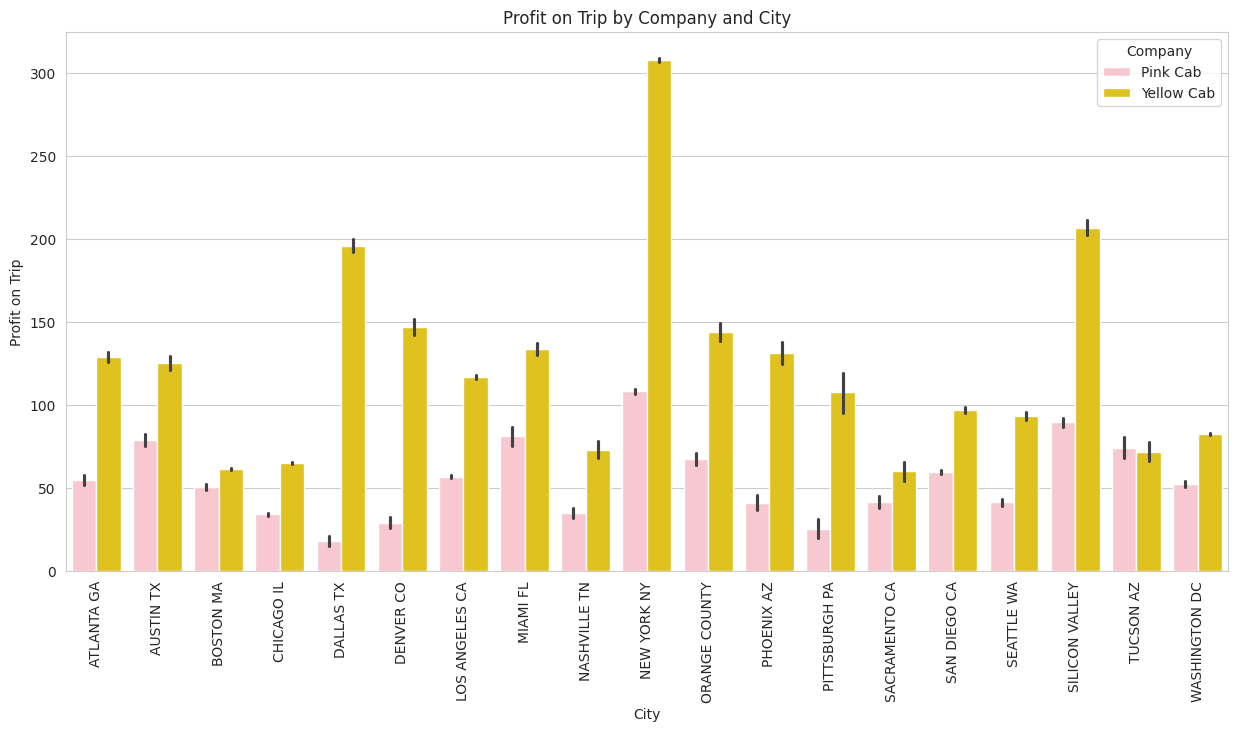

In [ ]:
plt.figure(figsize=(15, 7))
# Rotate x-axis labels
plt.xticks(rotation=90)

# Set color palette
sns.set_palette(['pink', 'gold'])

# Create barplot
sns.barplot(x='City', y='Profit on Trip', hue='Company', data=df)

# Add title
plt.title('Profit on Trip by Company and City')

# Show plot
plt.show()

# 5. Hypothesis Testing



## Hypothesis 1:   Is there any difference in profit regarding Company




H0: There is no difference in profit.

H1: There is difference in profit.

In [ ]:
# Filter profits by company
profit_Pink_Cab = df[df["Company"] == "Pink Cab"]["Profit"]
profit_Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Profit"]

# Print sample sizes (critical for t-test validity)
print(f"Pink Cab transactions: {profit_Pink_Cab.shape[0]}")
print(f"Yellow Cab transactions: {profit_Yellow_Cab.shape[0]}")

# Welch's t-test (unequal variances assumed)
t_stat, p_value = stats.ttest_ind(profit_Pink_Cab, profit_Yellow_Cab, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

# Interpret results
if p_value < 0.05:
    print("Reject H₀:  There is difference in profit (H₁)")
else:
    print("Fail to reject H₀: There is difference in profit (H₀)")

Pink Cab transactions: 84711
Yellow Cab transactions: 274681
T-statistic: -230.996, P-value: 0.00000
Reject H₀:  There is difference in profit (H₁)


There is significant difference in "Profit" between different company.

## Hypothesis 2: Is there any difference in KM travelled regarding Company

H0: There is no difference in travel distance.

H1: There is difference in travel distance.

In [ ]:
# Filter KM Travelled by company
km_pink = df[df["Company"] == "Pink Cab"]["KM Travelled"]
km_yellow = df[df["Company"] == "Yellow Cab"]["KM Travelled"]

# Print sample sizes (critical for t-test validity)
print(f"Pink Cab trips: {km_pink.shape[0]}")
print(f"Yellow Cab trips: {km_yellow.shape[0]}")

# Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(km_pink, km_yellow, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

# Interpret results
if p_value < 0.05:
    print("Reject H₀: Significant difference in distance travelled (H₁)")
    print(f"Yellow Cab travels farther per trip." if km_yellow.mean() > km_pink.mean()
          else "Pink Cab travels farther per trip.")
else:
    print("Fail to reject H₀: No significant distance difference (H₀)")

Pink Cab trips: 84711
Yellow Cab trips: 274681
T-statistic: -0.200, P-value: 0.84171
Fail to reject H₀: No significant distance difference (H₀)


There is no significant difference in "KM Travelled" between different company.

## Hypothesis 3: Is there any difference in profit regarding Gender

H0 : There is no difference regarding Gender in both cab companies                      
H1 : There is difference regarding Gender in both cab companies

In [ ]:
def test_gender_profit_difference(company_name):
    # Filter data by company and gender
    male_profit = df[(df['Gender'] == 'Male') & (df['Company'] == company_name)].groupby('Transaction ID')['Profit'].mean()
    female_profit = df[(df['Gender'] == 'Female') & (df['Company'] == company_name)].groupby('Transaction ID')['Profit'].mean()

    # Print sample sizes
    print(f"\n{company_name} - Male transactions: {male_profit.shape[0]}, Female transactions: {female_profit.shape[0]}")

    # Check variance equality (Levene's test)
    _, levene_p = stats.levene(male_profit, female_profit)
    equal_var = True if levene_p > 0.05 else False

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(male_profit, female_profit, equal_var=equal_var)

    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")
    print(f"Variance assumption: {'Equal' if equal_var else 'Unequal'}")

    # Interpret results
    if p_value < 0.05:
        print(f"Reject H₀: Significant profit difference by gender for {company_name} (H₁)")
        higher_group = 'Male' if male_profit.mean() > female_profit.mean() else 'Female'
        print(f"{higher_group} customers generate higher profit on average.")
    else:
        print(f"Fail to reject H₀: No significant profit difference by gender for {company_name} (H₀)")

# Run tests for both companies
test_gender_profit_difference("Pink Cab")
test_gender_profit_difference("Yellow Cab")


Pink Cab - Male transactions: 47231, Female transactions: 37480
T-statistic: 1.575, P-value: 0.11515
Variance assumption: Equal
Fail to reject H₀: No significant profit difference by gender for Pink Cab (H₀)

Yellow Cab - Male transactions: 158681, Female transactions: 116000
T-statistic: 10.375, P-value: 0.00000
Variance assumption: Unequal
Reject H₀: Significant profit difference by gender for Yellow Cab (H₁)
Male customers generate higher profit on average.


Male customers generate higher profit on average for Yellow cab

## Hypothesis 4: Is there any difference in Profit regarding Age

H0 : There is no difference regarding Age in both cab companies

H1 : There is difference regarding Age in both cab companies

In [ ]:
def test_age_profit_difference(company_name):
    # Filter data by company and age groups
    young_profit = df[(df['Age'] <= 60) & (df['Company'] == company_name)].groupby('Transaction ID')['Profit'].mean()
    senior_profit = df[(df['Age'] > 60) & (df['Company'] == company_name)].groupby('Transaction ID')['Profit'].mean()

    # Print sample sizes
    print(f"\n{company_name} - ≤60 transactions: {young_profit.shape[0]}, >60 transactions: {senior_profit.shape[0]}")

    # Check variance equality (Levene's test)
    _, levene_p = stats.levene(young_profit, senior_profit)
    equal_var = True if levene_p > 0.05 else False

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(young_profit, senior_profit, equal_var=equal_var)

    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")
    print(f"Variance assumption: {'Equal' if equal_var else 'Unequal'}")

    # Interpret results
    if p_value < 0.05:
        print(f"Reject H₀: Significant profit difference by age for {company_name} (H₁)")
        higher_group = '≤60' if young_profit.mean() > senior_profit.mean() else '>60'
        print(f"{higher_group} customers generate higher profit on average.")
    else:
        print(f"Fail to reject H₀: No significant profit difference by age for {company_name} (H₀)")

# Run tests for both companies
test_age_profit_difference("Pink Cab")
test_age_profit_difference("Yellow Cab")


Pink Cab - ≤60 transactions: 80125, >60 transactions: 4586
T-statistic: 1.317, P-value: 0.18796
Variance assumption: Equal
Fail to reject H₀: No significant profit difference by age for Pink Cab (H₀)

Yellow Cab - ≤60 transactions: 260356, >60 transactions: 14325
T-statistic: 5.267, P-value: 0.00000
Variance assumption: Unequal
Reject H₀: Significant profit difference by age for Yellow Cab (H₁)
≤60 customers generate higher profit on average.


It appears that the Yellow Cab company provides discounts to its clients who are over 60.

## Hypothesis 5: Does profit differ between cash and card payments for each cab company?

H0 : There is no difference in average profit between cash and card payments.

H1 : There is a difference in average profit between cash and card payments.

In [ ]:
def test_payment_profit_difference(company_name):
    # Filter data by company and payment mode
    cash_profit = df[(df['Payment_Mode'] == 'Cash') & (df['Company'] == company_name)].groupby('Transaction ID')['Profit'].mean()
    card_profit = df[(df['Payment_Mode'] == 'Card') & (df['Company'] == company_name)].groupby('Transaction ID')['Profit'].mean()

    # Print sample sizes
    print(f"\n{company_name} - Cash transactions: {cash_profit.shape[0]}, Card transactions: {card_profit.shape[0]}")

    # Check variance equality (Levene's test)
    _, levene_p = stats.levene(cash_profit, card_profit)
    equal_var = True if levene_p > 0.05 else False

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(cash_profit, card_profit, equal_var=equal_var)

    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")
    print(f"Variance assumption: {'Equal' if equal_var else 'Unequal'}")

    # Interpret results
    if p_value < 0.05:
        print(f"Reject H₀: Significant profit difference by payment mode for {company_name} (H₁)")
        higher_mode = 'Cash' if cash_profit.mean() > card_profit.mean() else 'Card'
        print(f"{higher_mode} payments generate higher profit on average.")
    else:
        print(f"Fail to reject H₀: No significant profit difference by payment mode for {company_name} (H₀)")

# Run tests for both companies
test_payment_profit_difference("Pink Cab")
test_payment_profit_difference("Yellow Cab")


Pink Cab - Cash transactions: 33992, Card transactions: 50719
T-statistic: -0.266, P-value: 0.79005
Variance assumption: Equal
Fail to reject H₀: No significant profit difference by payment mode for Pink Cab (H₀)

Yellow Cab - Cash transactions: 109896, Card transactions: 164785
T-statistic: 1.051, P-value: 0.29331
Variance assumption: Equal
Fail to reject H₀: No significant profit difference by payment mode for Yellow Cab (H₀)


There is no difference in average profit between cash and card payments.